# Simulations for Time Series Models

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import pandas as pd
#import pandas_profiling
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

In [2]:
def tsplot(y, 
           lags=None, 
           title='', 
           figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    
    Original source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [3]:
def tsplot_1(w,
             x,
             y,
             z, 
             title = ['Open', 'High', 'Low', 'Close'],
             lags=None, 
             figsize=(14, 8)):
    '''Examine the patterns of time series.
    
    Original source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    w_ax   = plt.subplot2grid(layout, (0, 0))
    x_ax = plt.subplot2grid(layout, (0, 1))
    y_ax  = plt.subplot2grid(layout, (1, 0))
    z_ax = plt.subplot2grid(layout, (1, 1))
    
    w.plot(ax=w_ax)
    w_ax.set_title(title[0])
    x.plot(ax=x_ax)
    x_ax.set_title(title[1])
    y.plot(ax=y_ax)
    y_ax.set_title(title[2])
    z.plot(ax=z_ax)
    z_ax.set_title(title[3])
    sns.despine()
    plt.tight_layout()
    return w_ax, x_ax, y_ax, z_ax

# Introduction to Time Series and Their Components

A time series is a set of sequential data points, which is usually illustrated using graph. They are usually indexed by time. 

The following is the time series of historical open, high, low and close prices (OHLC) of Bitcoin, which is indexed by date. 

In [4]:
BitCoin = pd.read_csv('BTC-USD.csv', index_col = 0)
BitCoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-18,7383.390137,7563.700195,7289.899902,7477.500000,7477.500000,522544440
2018-07-19,7477.100098,7676.549805,7279.339844,7333.930176,7333.930176,603034414
2018-07-20,7333.930176,7453.069824,7220.370117,7405.399902,7405.399902,297440355
2018-07-21,7405.399902,7569.279785,7345.250000,7398.640137,7398.640137,355565264
2018-07-22,7398.640137,7798.589844,7376.660156,7718.000000,7718.000000,745533303


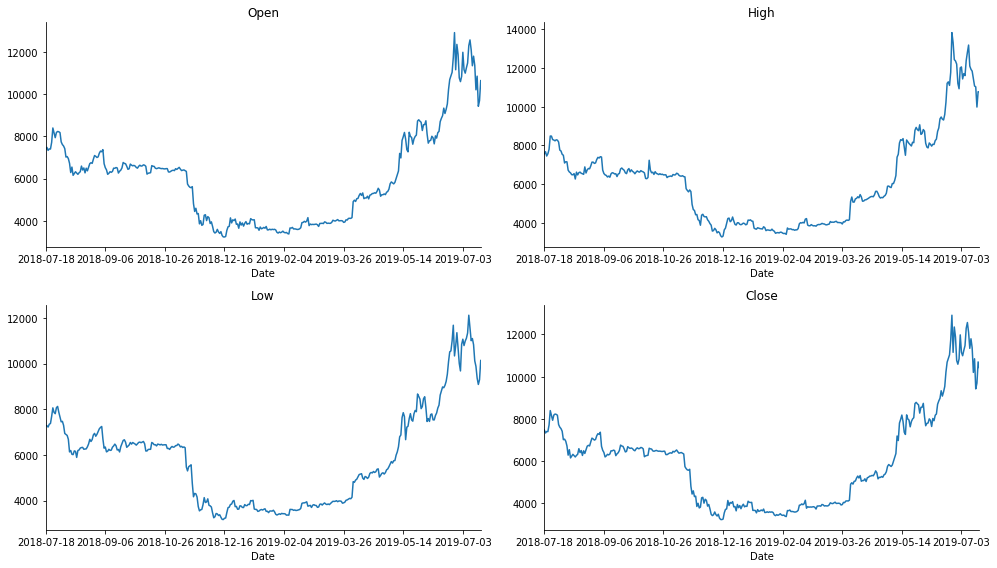

In [6]:
tsplot_1(BitCoin['Open'], 
         BitCoin['High'], 
         BitCoin['Low'], 
         BitCoin['Close']);

In [7]:
# a glimpse of the data set
BitCoin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2018-07-18 to 2019-07-19
Data columns (total 6 columns):
Open         366 non-null float64
High         366 non-null float64
Low          366 non-null float64
Close        366 non-null float64
Adj Close    366 non-null float64
Volume       366 non-null int64
dtypes: float64(5), int64(1)
memory usage: 20.0+ KB


In [8]:
# summary of descriptive statistics of BitCoin
BitCoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,6004.344969,6165.423819,5845.735810,6012.809532,6012.809532,3.885772e+08
std,2197.605684,2309.237345,2082.604271,2208.962864,2208.962864,3.224718e+08
min,3232.510010,3271.760010,3169.530029,3232.510010,3232.510010,5.672742e+07
25%,3938.335022,4018.497498,3849.284973,3938.335022,3938.335022,1.744939e+08
50%,6250.584961,6373.560059,6133.984863,6249.959961,6249.959961,2.941960e+08
75%,7038.667358,7262.729858,6868.762451,7038.532593,7038.532593,4.789539e+08
max,12913.280273,13826.759766,12117.309570,12913.280273,12913.280273,2.685872e+09


In [9]:
# return dates corresponding to maximum OHLC price
BitCoin.idxmax()

Open         2019-06-26
High         2019-06-25
Low          2019-07-08
Close        2019-06-25
Adj Close    2019-06-25
Volume       2019-06-25
dtype: object

In [10]:
# return dates corresponding to minimum OHLC price
BitCoin.idxmin()

Open         2018-12-16
High         2018-12-15
Low          2018-12-15
Close        2018-12-15
Adj Close    2018-12-15
Volume       2019-03-31
dtype: object

In [11]:
# More comprehensive function for dataframe's describe is the pandas_profiling,
# whose source can be found at https://github.com/pandas-profiling/pandas-profiling
# But please be aware that it takes a long time for it to run on large data set.

#import pandas_profiling
#BitCoin[:100].profile_report()

Time series analysis is used to analyse time series data such as observing its trend, whether the time series is exhibiting uptrend, downtrend or seasonal so that one can predict future information. 
Another purpose of time series analysis is to extract meaningful statistics and other characteristics of the data.

All time series can be classified into the following.

1. Trend - tendency to increase, decrease or stagnate
2. Seasonal - periodic fluctuation with fixed period
3. Cyclical - fluctuations with irregular perios
4. Irregular - unpredictable movements and no repetition

In [12]:
Apple = pd.read_csv('AAPL.csv', index_col = 0)
Apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-20,191.779999,192.429993,190.169998,191.440002,188.569595,20676200
2018-07-23,190.679993,191.960007,189.559998,191.610001,188.737030,15989400
2018-07-24,192.449997,193.660004,192.050003,193.000000,190.106216,18697900
2018-07-25,193.059998,194.850006,192.429993,194.820007,191.898926,16709900
2018-07-26,194.610001,195.960007,193.610001,194.210007,191.298080,19076000


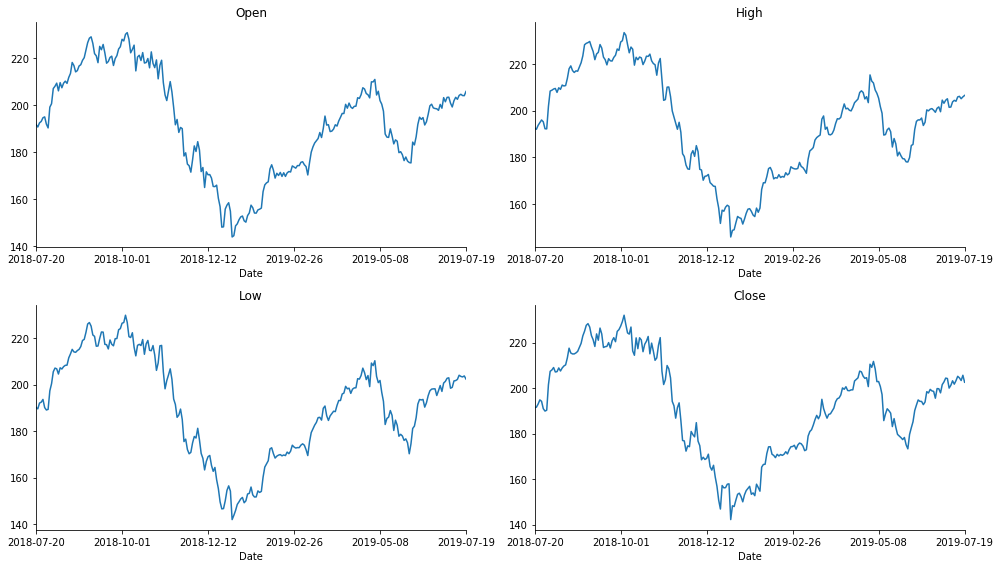

In [14]:
tsplot_1(Apple['Open'], 
         Apple['High'], 
         Apple['Low'], 
         Apple['Close'], 
         lags = 50);

In [15]:
# summary of descriptive statistics of Apple stock price
Apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,192.546255,194.546972,190.612590,192.631793,191.308551,3.258630e+07
std,21.689427,21.813869,21.625175,21.696844,21.269797,1.385037e+07
min,143.979996,145.720001,142.000000,142.190002,141.039642,1.136200e+07
25%,174.805000,175.934998,173.555000,174.794998,174.024834,2.320120e+07
50%,194.699997,196.369995,193.139999,194.210007,194.149994,2.966390e+07
75%,209.315002,210.089997,206.904999,208.875000,206.743652,3.876575e+07
max,230.779999,233.470001,229.779999,232.070007,229.392090,9.624670e+07


In [16]:
# return index that has maximum Open price
Apple.idxmax()

Open         2018-10-04
High         2018-10-03
Low          2018-10-03
Close        2018-10-03
Adj Close    2018-10-03
Volume       2018-09-21
dtype: object

In [17]:
# row which has maximum open price
Apple.loc['2018-10-04']

Open         2.307800e+02
High         2.323500e+02
Low          2.267300e+02
Close        2.279900e+02
Adj Close    2.253592e+02
Volume       3.204200e+07
Name: 2018-10-04, dtype: float64

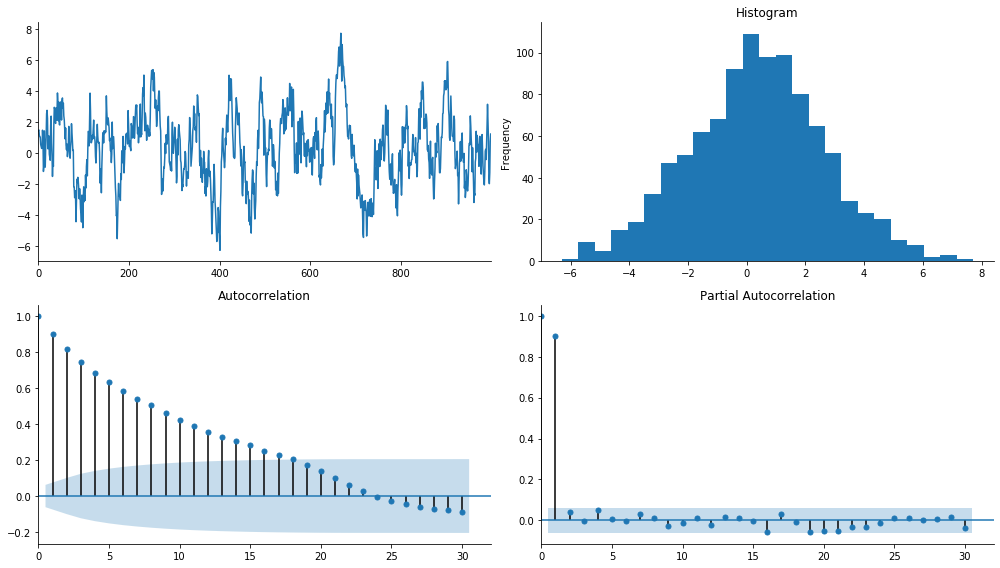

In [19]:
# Plot AR(1) with parameter = +0.9
ar = np.array([1, -0.9])   # Note that \phi(L)(y_t - X_t b) = theta(L) e_t. So negative 0.9
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=1000)
simulated_data = pd.Series(simulated_data_1)
tsplot(simulated_data);

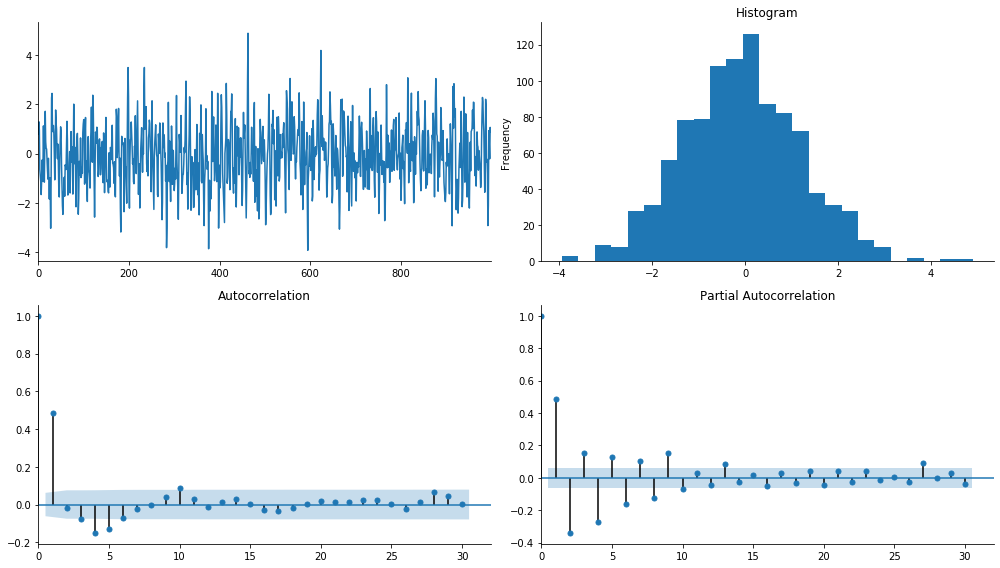

In [21]:
# Plot MA(1) parameter = +0.9
ar = np.array([1])   
ma = np.array([1, 0.9])    # Note that \phi(L)(y_t - X_t b) = theta(L) e_t. So negative 0.9
MA_object = ArmaProcess(ar, ma)
simulated_data_1 = MA_object.generate_sample(nsample=1000)
simulated_data = pd.Series(simulated_data_1)
tsplot(simulated_data);